# SMT Python Seminar - Probability distributions

* generating samples from probability distributions
* estimation and visualization of probability distributions

## Enabling some magic

More on the Jupyter magic commands: https://alexsm.com/jupyter-notebook-ipython-magic/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Generate samples

In [4]:
nd = stats.norm(loc=5., scale=1.)
nd_samples = nd.rvs(size=1000)

print(nd_samples[:50])

[5.40170129 3.79405182 4.65942808 6.47242437 4.9537624  5.59537652
 4.01820669 5.18016584 4.93357325 2.09089738 3.32636763 3.39872823
 4.73979309 3.42348273 4.10295943 4.0697604  4.91433272 4.59335355
 4.25698149 4.84747627 5.02493527 3.13261115 4.98053559 3.88163895
 3.34371255 6.94025158 6.19473726 5.05524186 5.39010469 4.99913843
 6.81595521 3.92970924 4.72244619 4.55158516 5.56607149 5.24898687
 4.44513618 2.87893466 3.64587532 6.21937377 4.91211487 4.94900176
 4.60622667 5.11439914 3.68934932 5.80351433 5.03808753 4.84891306
 3.69379291 7.13289868]


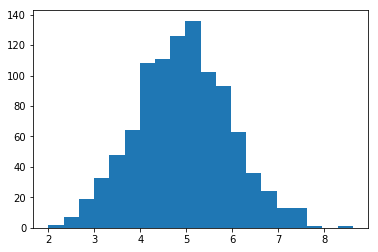

In [5]:
_ = plt.hist(nd_samples, bins=20)

## Fit and visualize PDF

In [6]:
def plot_frozen_distrib(x0, x1, distrib, linspace_num=200, fill_alpha=0.4, **plot_kvargs):
    """
    Visualize 1D continuous distribution on the given domain range
    """

    x = np.linspace(x0, x1, num=linspace_num)
    y = distrib.pdf(x)
    plt.plot(x, y, **plot_kvargs)

    fb_kvargs = {'alpha': fill_alpha}
    if 'color' in plot_kvargs:
        fb_kvargs['color'] = plot_kvargs['color']
    plt.fill_between(x, y, **fb_kvargs)

In [7]:
nd_estimated_mean, nd_estimated_std = stats.norm.fit(nd_samples)
print(nd_estimated_mean, nd_estimated_std)

4.930722262347379 1.0175641358185348


In [8]:
frozen_normal = stats.norm(loc=nd_estimated_mean, scale=nd_estimated_std)

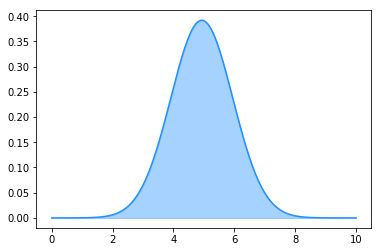

In [9]:
plot_frozen_distrib(0, 10, frozen_normal, color='dodgerblue')